In [1]:
import geocoder
import pandas as pd
import geopandas as gpd
import folium
from folium.features import DivIcon
# import datetime
import requests

In [2]:
meteo = requests.get('http://meteo.bg/izmervania/tochki') # s modul requests vzimam html koda ot saita
df_meteo = pd.read_html(meteo.text) # davam v pandas da prochete kyde ima tablici
temp_wind = df_meteo[0]  # izbiram tablicata

In [3]:
print(temp_wind.head())

     Станция           Дата/час  Температура [°C]                 Време   
0  Ново село  05.06.2023 г.15ч.                24  значителна облачност  \
1      Видин  05.06.2023 г.15ч.                24  значителна облачност   
2      Враца  05.06.2023 г.15ч.                21               облачно   
3    Монтана  05.06.2023 г.15ч.                21  значителна облачност   
4        Лом  05.06.2023 г.15ч.                23  значителна облачност   

   Вятър-скорост [m/s] Вятър-посока  Налягане [hPa]  
0                    3            E          1014.2  
1                    2            E          1015.7  
2                    1           SE           982.7  
3                    2           SW           993.6  
4                    4           NE          1017.6  


In [4]:
stations = temp_wind['Станция'].unique()
print(len(stations))

44


In [5]:
for i in range(len(stations)):
    stations[i] = stations[i] + ' България'
stations = stations.tolist()


In [6]:
stations = ['Ново село България', 'Видин България', 'Враца България', 'Монтана България', 'Лом България', 'Оряхово България',
            'Кнежа България', 'Ловеч България', 'Плевен България', 'Велико Търново България', 'Свищов България', 'Русе България',
            'Шумен България', 'Разград България', 'Силистра България', 'Силистра България', 'Варна България', 'Шабла България',
            'Калиакра България', 'Добрич България', 'вр. Мургаш България', 'Кюстендил България', 'Драгоман България', 'Благоевград България',
            'Черни връх България', 'София България', 'Пловдив - Тракия България', 'Пазарджик България', 'Чирпан България', 'Казанлък България',
            'Стара Загора България', 'Сливен България', 'Елхово България', 'Карнобат България', 'нос Емине България', 'Бургас България',
            'Ахтопол България', 'Сандански България', 'Гоце Делчев България', 'Рожен България', 'Кърджали България', 'Хасково България']

In [7]:
print(stations)

['Ново село България', 'Видин България', 'Враца България', 'Монтана България', 'Лом България', 'Оряхово България', 'Кнежа България', 'Ловеч България', 'Плевен България', 'Велико Търново България', 'Свищов България', 'Русе България', 'Шумен България', 'Разград България', 'Силистра България', 'Силистра България', 'Варна България', 'Шабла България', 'Калиакра България', 'Добрич България', 'вр. Мургаш България', 'Кюстендил България', 'Драгоман България', 'Благоевград България', 'Черни връх България', 'София България', 'Пловдив - Тракия България', 'Пазарджик България', 'Чирпан България', 'Казанлък България', 'Стара Загора България', 'Сливен България', 'Елхово България', 'Карнобат България', 'нос Емине България', 'Бургас България', 'Ахтопол България', 'Сандански България', 'Гоце Делчев България', 'Рожен България', 'Кърджали България', 'Хасково България']


In [8]:
coordinates_x = []
coordinates_y = []

for i in range(len(stations)):
    g = geocoder.osm(stations[i])
    print(i, g)
    coordinates_y.append(g.latlng[0])
    coordinates_x.append(g.latlng[1])

coords = {'X': coordinates_x, 'Y': coordinates_y}

df = pd.DataFrame(coords, index=None)  # creating dataframe from the dictionary

df = df.merge(temp_wind, left_index=True, right_index=True, how='inner')  # merge with the meteo table

0 <[OK] Osm - Geocode [Ново Село, Видин, 3784, България]>
1 <[OK] Osm - Geocode [Видин, България]>
2 <[OK] Osm - Geocode [Враца, България]>
3 <[OK] Osm - Geocode [Монтана, България]>
4 <[OK] Osm - Geocode [Лом, Монтана, България]>
5 <[OK] Osm - Geocode [Оряхово, Враца, 3300, България]>
6 <[OK] Osm - Geocode [Кнежа, Плевен, 5835, България]>
7 <[OK] Osm - Geocode [Ловеч, България]>
8 <[OK] Osm - Geocode [Плевен, 5805, България]>
9 <[OK] Osm - Geocode [Велико Търново, България]>
10 <[OK] Osm - Geocode [Свищов, Велико Търново, 5250, България]>
11 <[OK] Osm - Geocode [Русе, България]>
12 <[OK] Osm - Geocode [Шумен, България]>
13 <[OK] Osm - Geocode [Разград, България]>
14 <[OK] Osm - Geocode [Силистра, България]>
15 <[OK] Osm - Geocode [Силистра, България]>
16 <[OK] Osm - Geocode [Варна, България]>
17 <[OK] Osm - Geocode [Шабла, Добрич, България]>
18 <[OK] Osm - Geocode [Калиакра АД, Добрич, България]>
19 <[OK] Osm - Geocode [Добрич, България]>
20 <[OK] Osm - Geocode [Високопланинска метеор

In [9]:
display(df.head())

,X,Y,Станция,Дата/час,Температура [°C],Време,Вятър-скорост [m/s],Вятър-посока,Налягане [hPa]
0,22.800978,44.123620,Ново село,05.06.2023 г.15ч.,24,значителна облачност,3,E,1014.2
1,22.679487,43.801283,Видин,05.06.2023 г.15ч.,24,значителна облачност,2,E,1015.7
2,23.716534,43.399902,Враца,05.06.2023 г.15ч.,21,облачно,1,SE,982.7
3,23.116077,43.480152,Монтана,05.06.2023 г.15ч.,21,значителна облачност,2,SW,993.6
4,23.238664,43.820170,Лом,05.06.2023 г.15ч.,23,значителна облачност,4,NE,1017.6


In [10]:
sunny = 'слънчево/ясно'
cloudy = ['облачно', 'значителна облачност', 'разкъсана облачност', 'мъгла', 'видимост под 10km']
rainy = ['слаб краткотраен дъжд', 'краткотраен дъжд в последния час', 'силен краткотраен дъжд',
'гръмотевична буря в последния час', 'гръмотевична буря', 'слаб дъжд']

sun = '/home/user/Downloads/sun.png'
cloud = '/home/user/Downloads/cloud.png'
rain = '/home/user/Downloads/rain.png'

In [11]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['X'], df['Y']), crs="EPSG:4326")
weather_pp = gdf['Време'].to_list()
print(weather_pp)
print(gdf.head())

['значителна облачност', 'значителна облачност', 'облачно', 'значителна облачност', 'значителна облачност', 'значителна облачност', 'разкъсана облачност', 'значителна облачност', 'разкъсана облачност', 'значителна облачност', 'значителна облачност', 'облачно', 'разкъсана облачност', 'разкъсана облачност', 'слънчево/ясно', 'разкъсана облачност', 'разкъсана облачност', 'слънчево/ясно', 'слънчево/ясно', 'разкъсана облачност', 'облачно', 'краткотраен дъжд в последния час', 'облачно', 'облачно', 'мъгла в последния час', 'слаб краткотраен дъжд', 'мъгла', 'облачно', 'мъгла', 'облачно', 'значителна облачност', 'облачно', 'облачно', 'разкъсана облачност', 'слънчево/ясно', 'разкъсана облачност', 'разкъсана облачност', 'разкъсана облачност', 'слънчево/ясно', 'облачно', 'облачно', 'облачно']
           X          Y    Станция           Дата/час  Температура [°C]   
0  22.800978  44.123620  Ново село  05.06.2023 г.15ч.                24  \
1  22.679487  43.801283      Видин  05.06.2023 г.15ч.      

In [12]:
for x in range(len(weather_pp)):
  if weather_pp[x] in cloudy:
    weather_pp[x] = cloud
  elif weather_pp[x] in rainy:
    weather_pp[x] = rain
  else:
    weather_pp[x] = sun

In [13]:
print(weather_pp)
print(len(weather_pp))

['/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/sun.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/sun.png', '/home/user/Downloads/sun.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/rain.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/sun.png', '/home/user/Downloads/rain.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/cloud.png', '/home/user/Downloads/c

In [14]:
gdf['weather'] = weather_pp
attribution = 'Map tiles by <a href="http://stamen.com">Stamen Design</a>, <a href="http://creativecommons.org/licenses/by/3.0">CC BY 3.0</a> &mdash; Map data &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors'


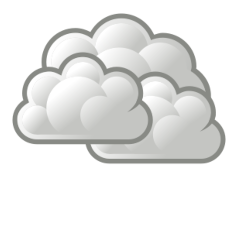
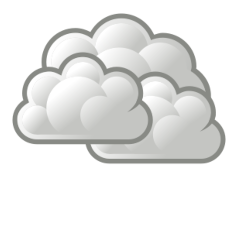
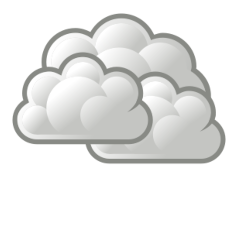
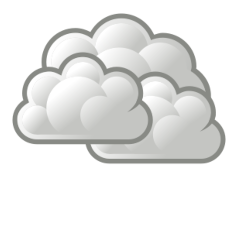
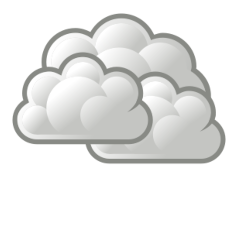
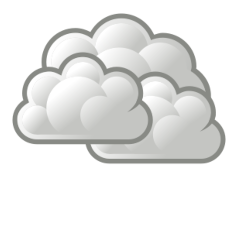
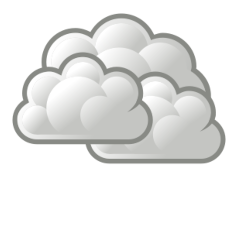
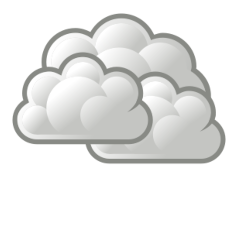
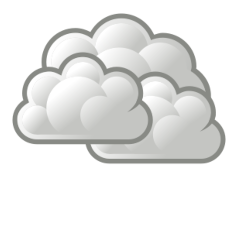
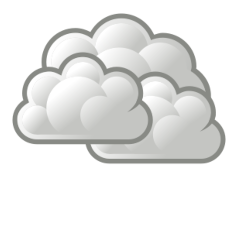
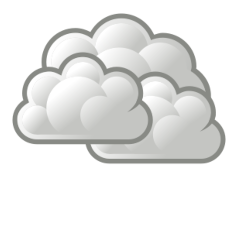
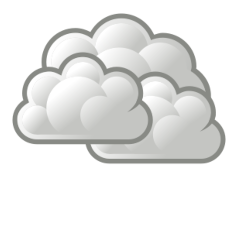
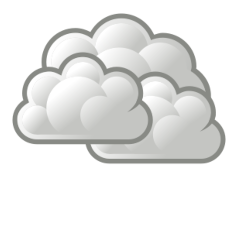
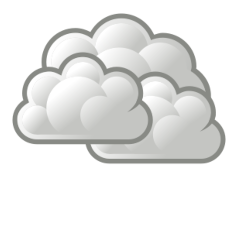
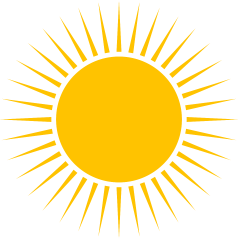
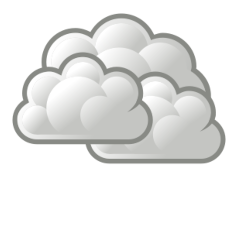
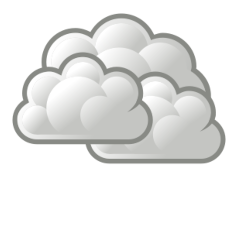
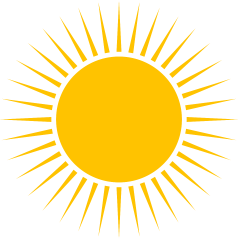
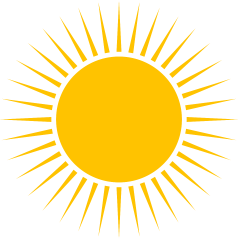
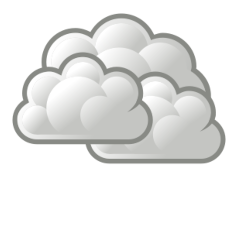
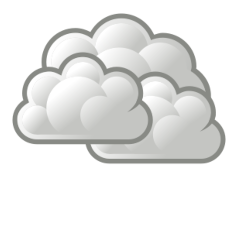
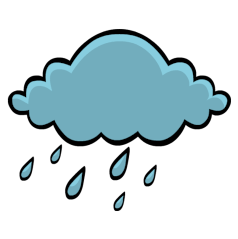
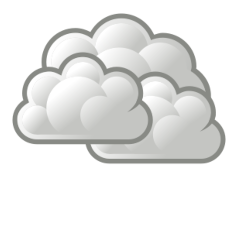
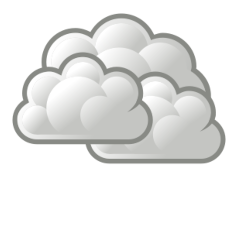
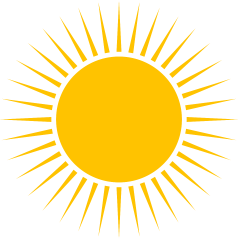
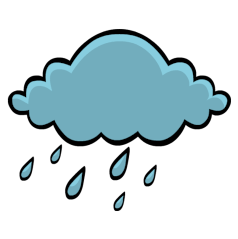
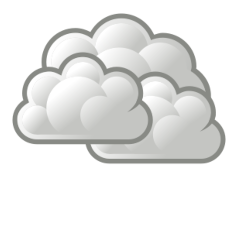
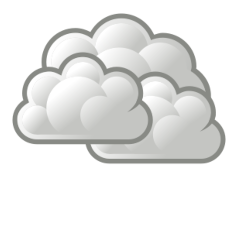
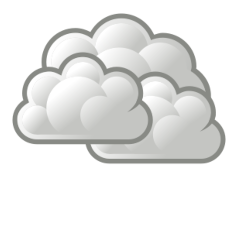
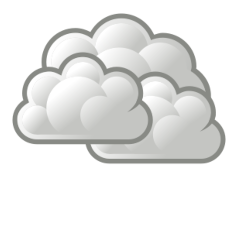
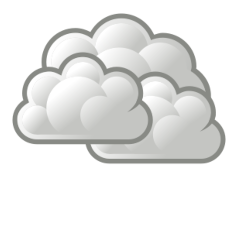
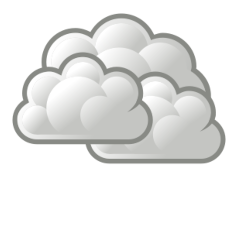
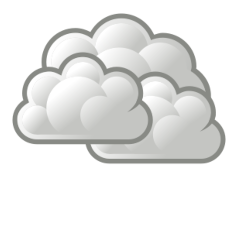
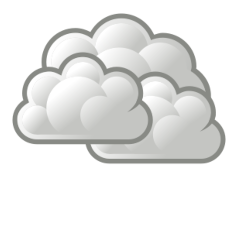
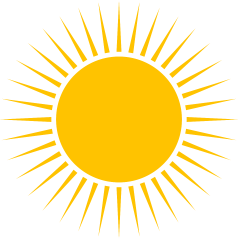
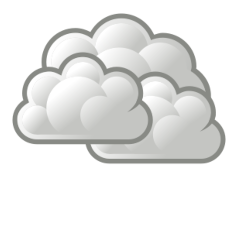
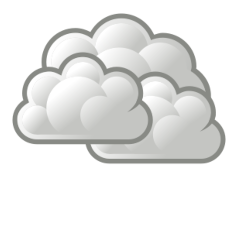
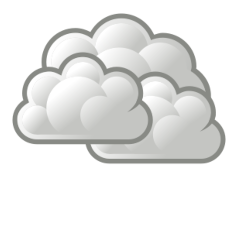
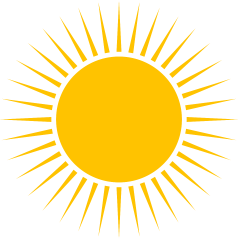
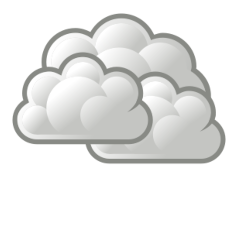
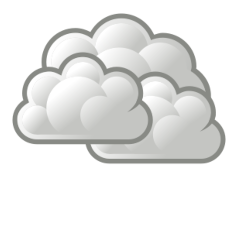
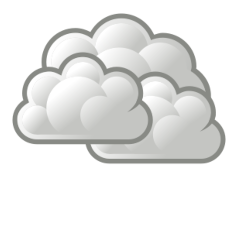

In [15]:
m = folium.Map(location=[43.708902, 24.890053], zoom_start=8, tiles='https://stamen-tiles-{s}.a.ssl.fastly.net/terrain-background/{z}/{x}/{y}{r}.png', attr=attribution)
for i in range(len(gdf)):
    location=[gdf['Y'][i], gdf['X'][i]]
    icon = folium.CustomIcon(icon_image=gdf['weather'][i], icon_size=(35,35))
    folium.Marker(location=location, icon=icon).add_to(m)

for i in range(len(gdf)):
    location=[gdf['Y'][i], gdf['X'][i]]
    # popups = "<iframe src='/home/user/filav/Danube_Map/html/Q_temp_{}.html' \
    # title='testo' height='300' width='400' ></iframe>".format(station_names[x])
    folium.Marker(location=location, icon=DivIcon(icon_size=(30,30),\
    icon_anchor=(-20,20),\
    html="""<div style="font-size:14px; white-space:nowrap"><b>{}</b></div>""".format(gdf['Станция'][i]))).add_to(m)

for i in range(len(gdf)):
    location=[gdf['Y'][i], gdf['X'][i]]
    # popups = "<iframe src='/home/user/filav/Danube_Map/html/Q_temp_{}.html' \
    # title='testo' height='300' width='400' ></iframe>".format(station_names[x])
    folium.Marker(location=location, icon=DivIcon(icon_size=(30,30),\
    icon_anchor=(-20,0),\
    html="""<div style="font-size:16px; backround-color:'white'"><b>{}</b></div>""".format(str(str(gdf['Температура [°C]'][i]) + '°C')))).add_to(m)
m